In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Deepcopy 없이 Narrowcopy로 진행

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2880\1957452834.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### problem A - 데이터 전처리 데이터 읽어오기
디렉토리에서 데이터를 불러오는 방법
- pd.read_csv를 활용하여 디렉토리에서 csv 받았다. 또한, 불필요한 열을 받지 않았다.
- 확인을 위해서 head(6)를 넣어서 잘 데이터를 받았는지 확인한다.

In [5]:
df = pd.read_csv('./example/archive/NFLX.csv', usecols=range(0,5))
print(df.head(6))

         Date        Open        High         Low       Close
0  2018-02-05  262.000000  267.899994  250.029999  254.259995
1  2018-02-06  247.699997  266.700012  245.000000  265.720001
2  2018-02-07  266.579987  272.450012  264.329987  264.559998
3  2018-02-08  267.079987  267.619995  250.000000  250.100006
4  2018-02-09  253.850006  255.800003  236.110001  249.470001
5  2018-02-12  252.139999  259.149994  249.000000  257.950012


### problem B - 데이터 전처리 2021년 이후 종가 데이터를 출력하기
기존 df를 필요한 형태로 가공해서 df_2021을 만든다.
- df['Date']의 2021-12-31 이후의 데이터를 필터링해서 받는다.
- 이후 데이터를 Matplotlib를 활용하여 그래프를 만든다.

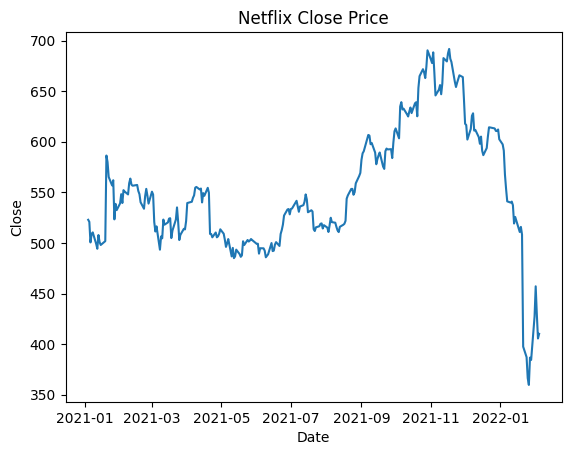

In [6]:
# 날짜 데이터 변환과 2021년부터의 데이터를 새로운 데이터 프레임으로 저장
df['Date'] = pd.to_datetime(df["Date"])
df_2021 = df[df['Date'] > '2020-12-31']

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_2021['Date'], df_2021['Close'])
plt.title('Netflix Close Price')

# label 
plt.xlabel('Date')
plt.ylabel('Close')


# 그래프 표시
plt.show()

### problem C - 데이터 전처리 출력 2021년 이후 최고, 최저 종가 데이터 출력하기
2021년 이후 데이터를 built-in function을 이용하여 max, min을 받는다.
- max(), min()을 이용하여 종가 데이터가 높은 것과 낮은 것을 출력한다.

In [7]:
max_price = max(df_2021['Close'])
min_price = min(df_2021['Close'])
print('최고 종가:', max_price)
print('최저 종가:', min_price)

최고 종가: 691.690002
최저 종가: 359.700012


### problem D - 데이터 전처리 분석 2021년 이후 월 별 평균 종가 출력하기
2021년 이후 데이터를 월 별로 그룹화하여 평균 종가를 계산한 열을 가시화한다.
- 월별 그룹화를 하고, 종가를 평균시킨 열을 추가시켜서 그 열을 비교, 가시화한다.

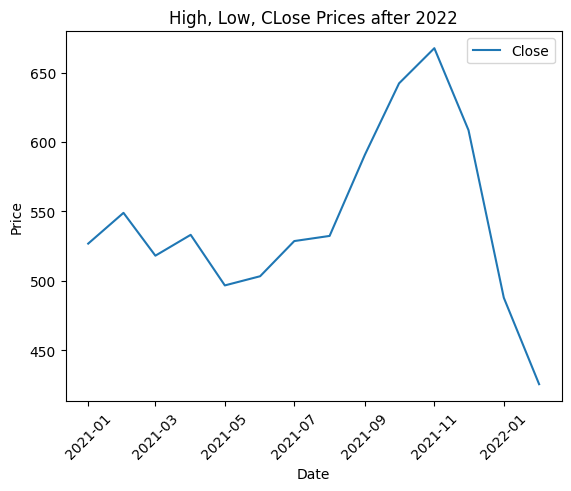

In [8]:
# 날짜 데이터 변환과 2021년부터의 데이터를 새로운 데이터 프레임으로 저장
df_2021 = df[df['Date'] > '2020-12-31']
df_2021.loc[:, 'Date'] = pd.to_datetime(df_2021['Date'])

df_2021.set_index('Date', inplace=True)
df_2021_new = df_2021.resample('MS', offset = '1D').mean()
df_2021_new.reset_index(inplace = True)

# 그래프 X축은 Date, Y축은 Close으로 plot()한다.
plt.plot(df_2021_new['Date'], df_2021_new['Close'], label='Close')

# 그래프 제목 설정
plt.title('Mean of CLose Prices after 2021')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


### problem E - 데이터 시각화 2022년 이후 최고, 최저 종가 시각화하기
csv를 2022년 이후의 데이터만 필터링하여, Matplotlib중 
- plt.plot() method를 이용하여 3가지 필드를 그래프로 그린다.
- 하나의 그림에 3가지 그래프를 한번에 표현할 수 있다! 

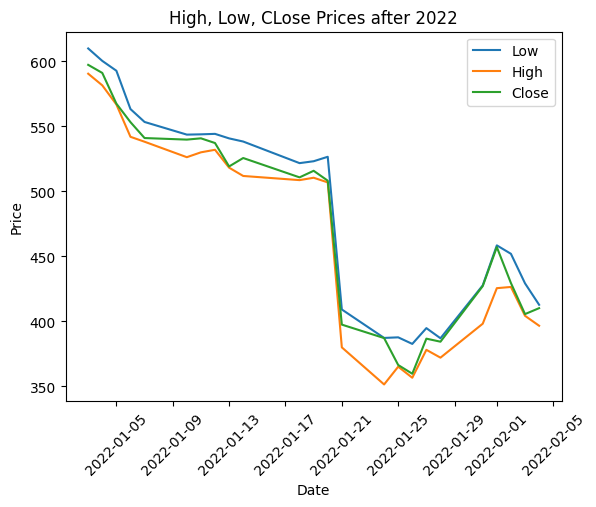

In [9]:
pd.to_datetime(df["Date"])
df_2022 = df[df['Date'] > '2021-12-31']

# 그래프 그리기
plt.plot(df_2022['Date'], df_2022['High'], label='Low')
plt.plot(df_2022['Date'], df_2022['Low'], label='High')
plt.plot(df_2022['Date'], df_2022['Close'], label='Close')

# 그래프 제목 설정
plt.title('High, Low, CLose Prices after 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()